In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True) #do not miss this line
#py.offline.iplot(fig)
df = pd.read_csv(r"C:\Users\ANSHU\Downloads\crimes_against_women_2001-2014.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


In [8]:
df.isnull().count()

Unnamed: 0                                             10677
STATE/UT                                               10677
DISTRICT                                               10677
Year                                                   10677
Rape                                                   10677
Kidnapping and Abduction                               10677
Dowry Deaths                                           10677
Assault on women with intent to outrage her modesty    10677
Insult to modesty of Women                             10677
Cruelty by Husband or his Relatives                    10677
Importation of Girls                                   10677
dtype: int64

In [9]:
#Check for null values
df.isnull().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [10]:
print(df['Importation of Girls'].value_counts()[0])

10399


In [12]:
df.drop(['Importation of Girls'],axis=1,inplace=True)

In [13]:
df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247
...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3


In [14]:
print(df['DISTRICT'].unique())
len(df['DISTRICT'].unique())

['ADILABAD' 'ANANTAPUR' 'CHITTOOR' ... 'Lakshadweep' 'Karaikal'
 'Puducherry']


1605

In [15]:
df['DISTRICT'].str.upper()

0                 ADILABAD
1                ANANTAPUR
2                 CHITTOOR
3                 CUDDAPAH
4            EAST GODAVARI
               ...        
10672          LAKSHADWEEP
10673    TOTAL DISTRICT(S)
10674             KARAIKAL
10675           PUDUCHERRY
10676    TOTAL DISTRICT(S)
Name: DISTRICT, Length: 10677, dtype: object

In [16]:
df['STATE/UT'].str.upper()

0        ANDHRA PRADESH
1        ANDHRA PRADESH
2        ANDHRA PRADESH
3        ANDHRA PRADESH
4        ANDHRA PRADESH
              ...      
10672       LAKSHADWEEP
10673       LAKSHADWEEP
10674        PUDUCHERRY
10675        PUDUCHERRY
10676        PUDUCHERRY
Name: STATE/UT, Length: 10677, dtype: object

In [17]:
df.isnull().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
dtype: int64

In [18]:
def func(total_case_all_years):

    for i in list(df.columns)[2:]:
        total_case_all_years[i]=df.groupby(['Year'])[i].sum()
        
    return total_case_all_years

total_case_all_years=pd.DataFrame()
total_case_all_years=func(total_case_all_years)
total_case_all_years

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives
Year,,,,,,,,
2001,ADILABADANANTAPURCHITTOORCUDDAPAHEAST GODAVARI...,1432716,32150,29290,13702,68248,19492,98340
2002,ADILABADANANTAPURCHITTOORCUDDAPAHEAST GODAVARI...,1439438,32746,29012,13644,67886,20310,98474
2003,ADILABADANANTAPURCHITTOORCUDDAPAHCYBERABADEAST...,1458184,31694,26592,12416,65878,24650,101406
2004,ADILABADANANTAPURCHITTOORCUDDAPAHCYBERABADEAST...,1460916,36466,31156,14052,69134,20002,116242
2005,ADILABADANANTAPURCHITTOORCUDDAPAHCYBERABADEAST...,1469665,36718,31500,13574,68350,19968,116638
2006,ADILABADANANTAPURCHITTOORCUDDAPAHCYBERABADEAST...,1484440,38696,34828,15236,73234,19932,126256
2007,ADILABADANANTAPURCHITTOORCUDDAPAHCYBERABADEAST...,1491201,41474,40832,16186,77468,21900,151860
2008,ADILABADANANTAPURCHITTOORCUDDAPAHCYBERABADEAST...,1528088,42934,45878,16344,80826,24428,162688
2009,ADILABADANANTAPURCHITTOORCUDDAPAHCYBERABADEAST...,1540903,42794,51482,16766,77422,22018,179092


In [84]:
#Total Number of cases in each year
total_number=pd.DataFrame(total_case_all_years.sum(axis=1),columns=['Total Number of Cases'])
total_number

,Total Number of Cases
Year,
2001,0.0
2002,0.0
2003,0.0
2004,0.0
2005,0.0
2006,0.0
2007,0.0
2008,0.0
2009,0.0


In [20]:
pd.DataFrame(total_case_all_years.sum(axis=1),columns=['Total Number of Cases']).sum()

Total Number of Cases    26755929
dtype: int64

In [21]:
import plotly.express as px
fig = px.bar(pd.DataFrame( total_case_all_years.sum(axis=1),columns=['Total Number of Cases']), 
             x=pd.DataFrame( total_case_all_years.sum(axis=1)).index, 
             y='Total Number of Cases',title='Total Number of Crimes in Each year',color_discrete_sequence=['green'])
fig.show()

In [24]:
def func(total_case_all_years_district):

    for i in list(df.columns)[2:]:
        total_case_all_years_district[i]=df.groupby(['DISTRICT'])[i].sum()
        
    return total_case_all_years_district

total_case_all_years_district=pd.DataFrame()
total_case_all_years_district=func(total_case_all_years_district)
total_case_all_years_district

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives
DISTRICT,,,,,,,,
24 PARGANAS NORTH,24 PARGANAS NORTH24 PARGANAS NORTH24 PARGANAS ...,26091,1998,2648,718,2226,55,19162
24 PARGANAS SOUTH,24 PARGANAS SOUTH24 PARGANAS SOUTH24 PARGANAS ...,26091,2410,2517,691,1650,21,20650
A and N ISLANDS,A and N ISLANDS,2007,3,9,1,21,2,18
ADILABAD,ADILABADADILABADADILABADADILABADADILABADADILAB...,26091,733,617,200,1982,1380,4590
AGAR,AGAR,2013,24,8,1,41,1,30
...,...,...,...,...,...,...,...,...
Yamunanagar,Yamunanagar,2014,50,82,7,76,0,170
Yavatmal,Yavatmal,2014,108,135,12,466,504,301
ZUNHEBOTO,ZUNHEBOTOZUNHEBOTOZUNHEBOTOZUNHEBOTOZUNHEBOTOZ...,26091,18,6,0,0,0,0


In [82]:
#Total Number of cases District wise 
total_number= pd.DataFrame(total_case_all_years_district.sum(axis=1),columns=['Total Number of Cases District wise'])

In [34]:
import plotly.express as px
fig = px.line(pd.DataFrame( total_case_all_years_district.sum(axis=1),columns=['Total Number of Cases District wise']), 
             x=pd.DataFrame( total_case_all_years_district.sum(axis=1)).index, 
             y='Total Number of Cases District wise',title='Total Number of Crimes in a Particular District',color_discrete_sequence=['red'])
fig.show()

In [33]:
fig = px.line(total_case_all_years_district, x=total_case_all_years_district.index, y='Rape',title='Year Wise Rape Cases District wise',color_discrete_sequence=['red'])
fig.show()

In [35]:
fig = px.line(total_case_all_years_district, x=total_case_all_years_district.index, 
             y='Kidnapping and Abduction',color_discrete_sequence=['brown'],title='Year Wise Kidnapping and Abduction Cases District wise')
fig.show()


In [36]:
fig = px.line(total_case_all_years_district, x=total_case_all_years_district.index, y='Dowry Deaths',color_discrete_sequence=['purple'],title='Year wise Dowry Deaths Cases District wise')
fig.show()

In [37]:
fig = px.line(total_case_all_years_district, x=total_case_all_years_district.index, y='Dowry Deaths',color_discrete_sequence=['purple'],title='Year wise Dowry Deaths Cases District wise')
fig.show()

In [38]:
fig = px.line(total_case_all_years_district, x=total_case_all_years_district.index, 
             y='Insult to modesty of Women',color_discrete_sequence=['brown'],title="Year Wise Insult to modesty of women Cases District wise")
fig.show()


In [39]:
fig = px.line(total_case_all_years_district, x=total_case_all_years_district.index, y='Cruelty by Husband or his Relatives',
             color_discrete_sequence=['black'],title='Year Wise Cruelty by Husband or his Relatives District wise')
fig.show()

In [ ]:
#Top 10 Districts With Highest Crime Rate

In [42]:
pd.DataFrame(total_case_all_years_district.sum(axis=1),columns=['Total Count']).sort_values(by='Total Count',ascending=False).head(10)

,Total Count
DISTRICT,
TOTAL,2817220
Total District(s),389852
ZZ TOTAL,366320
G.R.P.,99352
SOUTH,93145
WEST,91287
NORTH,88016
RAILWAYS,74514
DELHI UT TOTAL,72166


In [ ]:
#Top 10 States/Union Territories With Lowest Crime Rate

In [41]:
pd.DataFrame(total_case_all_years_district.sum(axis=1),columns=['Total Case'] ).sort_values(by='Total Case').head(10)

,Total Case
DISTRICT,
CRIME KASHMIR,2010
RAILWAYS KMR,2011
TRAFFIC PS,2013
DISCOM,2013
SPL NARCOTIC,2013
I&P HARYANA,2013
Wokha,2014
Guntakal Railway,2014
Vigilance,2014


In [46]:
#Percentange of each crime in between 2001-2014 piechart
fig = px.pie(pd.DataFrame(df.sum(axis=0),columns=['Count']), values='Count', names=pd.DataFrame(df.sum(axis=0)).index, title='Percentage of Each Crime between 2001 - 2014')
fig.show()

In [64]:
#STATE Wise Analysis

def func(state_wise):

    for i in list(df.columns)[2:]:
        state_wise[i]=df.groupby(['STATE/UT'])[i].sum()
        
    return state_wise

state_wise=pd.DataFrame()
state_wise=func(state_wise)
state_wise

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives
STATE/UT,,,,,,,,
A & N ISLANDS,ANDAMANNICOBARTOTALANDAMANNICOBARTOTALANDAMANN...,72239,218,154,12,428,86,242
A & N Islands,South AndamanNorth & Middle AndamanNicobarTota...,8056,64,34,6,82,10,28
A&N Islands,CARNORTHSOUTHZZ TOTAL,8052,54,24,2,90,16,18
ANDHRA PRADESH,ADILABADANANTAPURCHITTOORCUDDAPAHEAST GODAVARI...,742469,26958,29872,12430,103998,72262,238014
ARUNACHAL PRADESH,CHANGLANGDIBANG VALLEYKAMENG EASTKAMENG WESTLO...,391317,1000,1116,4,1568,36,334
...,...,...,...,...,...,...,...,...
UTTARAKHAND,ALMORABAGESHWARCHAMOLICHAMPAWATDEHRADUNHARIDWA...,337092,2756,4668,1812,3090,3038,8284
Uttar Pradesh,AGRAALIGARHALLAHABADAMBEDKAR NAGARAMETHIAMROHA...,310079,13034,40726,9608,31816,108,38504
Uttarakhand,ALMORABAGESHWARCHAMOLICHAMPAWATDEHRADUNHARIDWA...,56378,996,1816,162,1276,152,1472


In [65]:
import plotly.express as px
fig = px.line(pd.DataFrame(state_wise.sum(axis=1),columns=['Total Number of Cases State wise']), 
             x=pd.DataFrame(state_wise.sum(axis=1)).index, 
             y='Total Number of Cases State wise',title='Total Number of Crimes in a Particular State',color_discrete_sequence=['red'])
fig.show()

In [66]:
def which_district_you_want_to_analyze(district_name):
    try:
        fig = px.pie(total_case_all_years_district, values=total_case_all_years_district.loc[district_name], 
                     names=total_case_all_years_district.iloc[0,:].index, title='Total Crime Rate Distribution for {}'.format(district_name))
        fig.show()
    except KeyError:
        print('You Entered Wrong District Name')
    
district_name=input('Enter Name of District : ').upper()
which_district_you_want_to_analyze(district_name)

Enter Name of District : Baran


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345)

In [97]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [98]:
 knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse


0.13608276348795434

In [100]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.21081851067789195

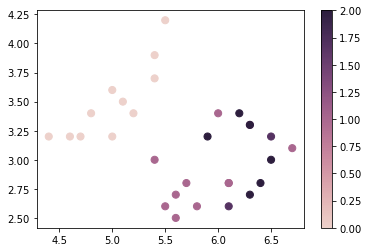

In [101]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
     X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap )
f.colorbar(points)
plt.show()

In [105]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [111]:
X= state_wise

In [112]:
preds_valid=knn_model.predict(X_train)
score_valid=mean_absolute_error(y_train,preds_valid)
print("MAE: ",score_valid)

MAE:  0.02777777777777778


In [ ]:
preds_test=model.predict(X)